In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2

In [2]:
# Rotate an image in form of numpy array 
# and return rotated image in the same form

def rotate_image(image_array: np.array, angle: int) -> np.array:

    image = image_array.copy()

    height, width = image.shape[:2]
    diagonal = np.sqrt(height ** 2 + width ** 2)
    padding = int((diagonal - min(height, width)) / 2)

    # Add padding to the image using BORDER_REFLECT or BORDER_REPLICATE mode
    padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REFLECT)

    # Calculate the center of the padded image
    center_x = width // 2 + padding
    center_y = height // 2 + padding

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

    # Apply the rotation to the padded image
    rotated = cv2.warpAffine(padded_image, rotation_matrix, (padded_image.shape[1], padded_image.shape[0]), flags=cv2.INTER_LINEAR)

    # Crop the rotated image to remove the padding
    rotated_cropped = rotated[padding:-padding, padding:-padding]

    return rotated_cropped


In [3]:
# visualize original image vs the rotated image
def visualize(original, rotated):
    
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(rotated_rgb)
    plt.axis("off")

In [23]:
path = '../Bsd_Bootcamp/Project/data/'

In [4]:
df = pd.read_csv(path + dataset.csv)
df.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label,source
0,0,59,62,63,43,46,45,50,48,43,...,184,140,151,118,84,123,92,72,6,cifar-10
1,1,154,177,187,126,137,136,105,104,95,...,133,139,143,134,142,143,133,144,9,cifar-10
2,2,255,255,255,253,253,253,253,253,253,...,85,83,79,85,83,80,86,84,9,cifar-10
3,3,28,25,10,37,34,19,38,35,20,...,47,28,63,56,37,72,65,46,4,cifar-10
4,4,170,180,198,168,178,196,177,185,203,...,79,82,71,75,78,73,77,80,1,cifar-10


In [17]:
df_cifar10 = df[df['source'] == 'cifar-10']
df_cifar10 = df_cifar10[df_cifar10.columns[1:]]

In [18]:
labels = df_cifar10['label'].unique()

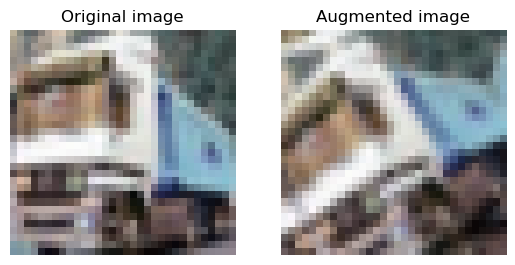

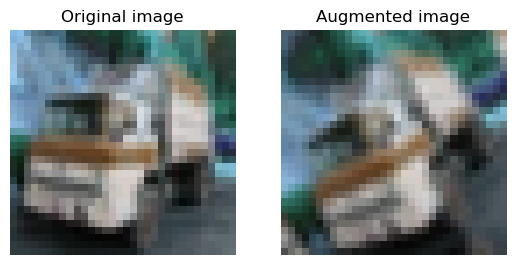

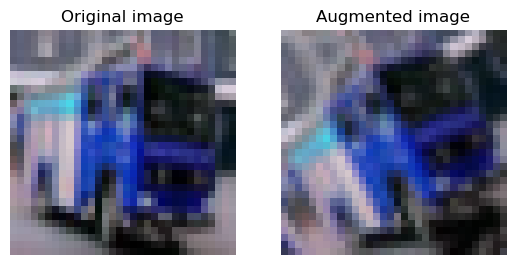

In [19]:
rotated_cifar10 = pd.DataFrame()
angle = 30
pixels = [col for col in df_cifar10.columns if col.startswith('pixel')]

for label in labels[1:2]:
    # create a DataFrame of the current label class
    df_class = df_cifar10[df_cifar10['label'] == label]
    # take only half class
    half_class_to_rotate = df_class.iloc[:df_class.shape[0]//2]
    half_class_to_save = df_class.iloc[df_class.shape[0]//2:]
    rotated_cifar10 = pd.concat([rotated_cifar10, half_class_to_save])
    
    for i in range(0, half_class_to_rotate.shape[0], 100):
        image_pixels = half_class_to_rotate[pixels].iloc[i]
        image_array = image_pixels.values.reshape(32,32,3).astype('uint8')
        rotated_image = rotate_image(image_array, angle)
        if i == 0 or i % 1000 == 0:
            visualize(image_array, rotated_image)
        
        rotated_image_df = pd.DataFrame(rotated_image.reshape(1, -1), columns=pixels)
        rotated_image_df['label'] = label
        rotated_image_df['source'] = 'cifar-10 rotated'
        
        rotated_cifar10 = pd.concat([rotated_cifar10, rotated_image_df])
#         df_cifar10_rotated.append(rotated_image)

In [20]:
rotated_cifar10

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label,source
30064,37,45,35,60,68,57,68,75,65,75,...,22,19,21,24,17,44,46,29,9,cifar-10
30068,135,119,119,126,111,111,133,128,124,135,...,148,154,148,151,155,153,157,158,9,cifar-10
30073,87,98,60,95,105,69,121,130,104,142,...,12,12,14,14,14,16,16,16,9,cifar-10
30080,56,118,193,54,116,189,54,116,190,54,...,85,54,110,90,59,109,89,58,9,cifar-10
30091,255,255,255,255,255,255,255,255,255,255,...,95,91,224,230,220,254,253,241,9,cifar-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,204,187,194,199,184,196,192,180,187,159,...,50,54,47,46,52,40,38,44,9,cifar-10 rotated
0,102,90,83,133,121,113,152,138,130,153,...,35,31,45,28,23,37,24,18,9,cifar-10 rotated
0,236,236,241,241,241,245,230,230,232,195,...,64,66,55,55,57,48,48,50,9,cifar-10 rotated
0,79,69,63,82,76,73,105,113,124,90,...,23,28,98,57,64,130,81,86,9,cifar-10 rotated


In [24]:
rotated_cifar10.to_csv(path + 'rotated_cifar10.csv', index=False)

In [25]:
def rotate_half_of_CIFAR_10(df_cifar10: pd.DataFrame) -> pd.DataFrame:
    rotated_cifar10 = pd.DataFrame()
    angle = 30
    pixels = [col for col in df_cifar10.columns if col.startswith('pixel')]

    for label in labels:
        # create a DataFrame of the current label class
        df_class = df_cifar10[df_cifar10['label'] == label]
        # take only half class
        half_class_to_rotate = df_class.iloc[:df_class.shape[0]//2]
        half_class_to_save = df_class.iloc[df_class.shape[0]//2:]
        rotated_cifar10 = pd.concat([rotated_cifar10, half_class_to_save])

        for i in range(half_class_to_rotate.shape[0]):
            image_pixels = half_class_to_rotate[pixels].iloc[i]
            image_array = image_pixels.values.reshape(32,32,3).astype('uint8')
            rotated_image = rotate_image(image_array, angle)
            rotated_image_df = pd.DataFrame(rotated_image.reshape(1, -1), columns=pixels)
            rotated_image_df['label'] = label
            rotated_image_df['source'] = 'cifar-10 rotated'
            rotated_cifar10 = pd.concat([rotated_cifar10, rotated_image_df])
        
    return rotated_cifar10   

In [ ]:
rotated_cifar10 = rotate_half_of_CIFAR_10(df_cifar10)